In [8]:
# 乱数とモンテカルロ法

# 「乱数」とは、サイコロを振って得たようなでたらめな数を次々に作る方法、またはそうして生成された数列を指す。
# 物理現象を利用した「物理乱数」と漸化式などに基づく「疑似乱数」とがある。
# 乱数の主な用途は、標本抽出、モンテカルロ計算、アルゴリズムや方法のテスト、暗号、シミュレーションなどである。

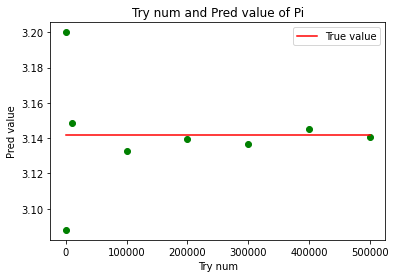

In [9]:
# モンテカルロ法

# 乱数を用いたシミュレーションを多数回実施し近似的な解を求める手法
# 「モンテカルロ法」でπやπ/4を求める問題は基本的であり、頻出である。

# 円周率(π)を求めてみる
# 以下の面積比を用いて導出する
# プロットした点の個数(N) : 円(1/4)の領域に入った点の個数(Ni)　= 1 : π/4

import numpy as np
import matplotlib.pyplot as plt

# 試行回数のリスト
n_tot = [100,1000,10000,100000,200000,300000,400000,500000]

for i in n_tot:
    # 乱数列の作成
    x1 = np.random.rand(i,2)
    # 全ての乱数列を2乗
    x2 = x1**2
    # 乱数列の2乗和の作成
    x3 = np.sum(x2,axis=-1)
    # 乱数列のルート 
    x4 = x3**0.5
    # 2乗和のルートが1未満の数の個数の計算
    x5 = np.count_nonzero(x4 < 1)    
    plt.plot(i,4*x5/i,color='green',marker='o')

x = [0,500000]
y = [np.pi,np.pi]
plt.plot(x, y, color = 'red',linestyle='solid', label='True value')

plt.title('Try num and Pred value of Pi')
plt.xlabel('Try num')
plt.ylabel('Pred value')
plt.legend()
plt.show() # 試行回数が増えるにつれ、3.14に近似することがわかる

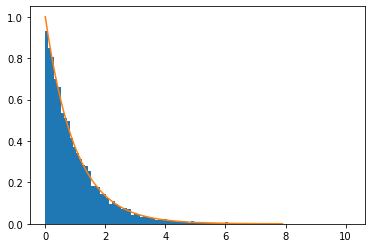

In [10]:
# 乱数生成：逆関数法

# シミュレーションで大事な方法の一つに、指定された確率分布に従う乱数の発生がある。
# あらゆる確率分布に従う乱数生成は、一様分布、つまり一様乱数の発生に基づいて行われる。
# 区間(0,1)の一様分布に従う確率変数をUとすると確率密度関数と分布関数はそれぞれ、x∈(0,1)で次のようになる
# pU(x) = 1, F(x) = ∫pU(x)dx = x
# 1変量の確率変数Xが確率密度関数pU(x)と分布関数FX(X)をもつとする。
# もし、FX(x)の逆関数FX(u)^(-1)が得られる場合、次の「逆関数法」と呼ばれる方法でXの乱数が生成できる・
# 1.U(0,1)から一様乱数uを一つ得る
# 2.x=FX(u)^(-1)とする

# 一様変数から指数分布に従う乱数を生成する

# 一様分布に従う乱数を10000個生成
U_data = np.random.rand(10000)

# 逆関数方法で指数分布に従うデータを生成
# 逆関数：-1/λ * log(1-u)
result_data = -np.log(1 - U_data) # λ=1の場合

# 乱数データのヒストグラムと指数分布の確率密度関数を描画
fig = plt.figure(facecolor="w")
ax = fig.add_subplot(111)
ax.hist(result_data, bins=100, density=True)
ax.plot(np.arange(0, 8, 0.1), np.exp(-1*np.arange(0, 8, 0.1)))
plt.show()

M = 2.669743994945347
サンプル数:100000 => 37605
実際の受理率:0.37605
理論的な受理率:0.37456774952703703


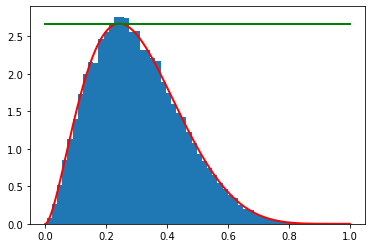

In [17]:
# 乱数生成：採択棄却法

# 確率変数xの確率密度関数をf(x)とし、計算可能な関数l(x)を使ってf(x)=c^(-1)*l(x), c=∫l(x)dx>0とする。
# 正規化定数cは積分を1にするためのものであり、計算できなくてもよい。
# このとき、ある確率密度関数g(x)と定数M>0があって、すべてのxで M*g(x)>=l(x)が成り立つと仮定する。
# さらに、ここではg(x)を密度にもつ確率変数の乱数生成はできると仮定する。
# 次に示す方法は「採択・棄却法」とよばれ、g(x)と一様乱数uを利用してf(x)を密度にもつ確率変数Xの乱数が生成できる。
# 1.g(x)から乱数xとU(0,1)から一様乱数をとる。
# r=l(x)/(M*g(x))としてu<=rならばxを出力し、そうでないならば1.に戻る。

import scipy.optimize
from scipy.stats import uniform, beta

np.random.seed()

# 目標とする密度関数f
f = beta(a=2.7, b=6.3).pdf

# 提案分布(一様分布)
gv = uniform
g = gv.pdf

# 分布の上限を指定する定数Mを設定
xopt = scipy.optimize.fmin(lambda x: -f(x), 0.0, disp=False)
M = f(xopt)[0]
print(f"M = {M}")

# 受理・棄却法
rand_count = 100000

# 提案分布gからの乱数Yを生成
Y = gv.rvs(size=rand_count)

# 一様乱数を生成
U = uniform.rvs(size=rand_count)

# Yか採択の条件を満たすサンプルXを残して残りを棄却
X = Y[U <= f(Y) / (M * g(Y))]
print(f"サンプル数:{len(Y)} => {len(X)}")
print(f"実際の受理率:{len(X) / float(len(Y))}")
print(f"理論的な受理率:{1.0 / M}")

# 目標分布を描画
x = np.linspace(0.0, 1.0, 1000)
y = f(x)
plt.plot(x, y, 'r-', lw=2)

# 提案分布(一様分布)を描画
y = M * uniform.pdf(x)
plt.plot(x, y, 'g-', lw=2)

# 採択した乱数の分布を描画
plt.hist(X, bins=50, density=True)

plt.show()

In [19]:
# モンテカルロ積分

# 関数g(x)の区間(0,1)上の積分を推定する問題 θ=∫g(x)dx を考える。
# 確率変数XがU(0,1)に従うとき E[g(x)] = ∫g(x)*1dx =  θ となる。
# したがって、X1,..,XmがU(0,1)からの無作為標本とするとき、以下のg(X1),..,g(Xm)の
# 標本平均θ_hatは、大数の弱法則によりm->∞のとき、θに確率収束する。
# θ_hat = 1/m*Σg(Xi) m個のU(0,1)上の一様乱数x1,..,xmを発生させ、
# θをθ_hat=1/m*Σg(xi)で推定する方法を「単純モンテカルロ法」という。 

# 単純モンテカルロ法による円周率の計算
# *先頭の計算と同じ
def f(x):
    return 1.0/(1.0+x**2)

# 試行回数のリスト
calc_count_list = [10, 10**2, 10**3, 10**4, 10**5, 10**6]

for N in  calc_count_list:
    count = 0.0
    for i in range(N):
        x = np.random.rand(1)  # [0,1]までの一様乱数をxに格納
        y = np.random.rand(1)  # [0,1]までの一様乱数をyに格納
        if y < f (x):   #もし円の中に入ったらそれをカウントする
            count +=1.0
    area = 4*count/N # 積分結果

    print(N, ", ", area, ", ", abs((np.pi-area)/np.pi))

10 ,  2.8 ,  0.10873231868538615
100 ,  3.32 ,  0.05678882213018502
1000 ,  3.036 ,  0.033611185546011474
10000 ,  3.1456 ,  0.00127557797973196
100000 ,  3.14176 ,  5.326801678625362e-05
1000000 ,  3.141212 ,  0.00012116580084253211


In [21]:
# ジャックナイフ法とブートストラップ法

# 母集団Fからの無作為標本を{x1,..,xn}とし、x=(x1,..,xn)とおく、母数θ=θ(F)に関心があり、
# θの推定量θ_hatがxの関数Tnでθ_hat=Tn(x)と書かれているとする。Tn(x)を統計量という。
# たとえば、θが母平均の場合、θ_hat=Tn(x)=(x1+,,+xn)/nである。
# θ_hatの標準誤差のジャックナイフ推定量を構成するために、xからxjを除いたベクトルを
# x(-j) = (x1,..xj-1,xj+1,..xn), j=1,..,n とする。また
# θj_hat = Tn-1(x(-j)), θ_hat_bar = 1/n*Σθ_hat とおくと、
# 推定量θ_hatの標準誤差のジャックナイフ推定量Sejackは以下で与えられる。
# Sejack = √(n-1)/n*Σ(θj_hat-θ_bar)^2
# 端的にいうと、「ジャックナイフ法」とは、無作為標本から得られた母数の推定量が不偏でないとき，
# 標本を分割して、幾つかの観測値を抜き取っては反復計算することで推定量のバイアスを減少させる方法のことで、
# この方法によって得られた推定量をジャックナイフ推定量という．

import sympy

def jackknife_estimator(r):
    divs = np.array(sympy.divisors(n))
    idx = np.abs(divs-np.sqrt(len(r))).argmin()
    bin_size = divs[idx]
    r2 = r ** 2
    r4 = r ** 4
    u_all = np.average(r4)/np.average(r2)**2
    r2 = [np.average(r2[i:i+bin_size]) for i in range(0, len(r), bin_size)]
    r4 = [np.average(r4[i:i+bin_size]) for i in range(0, len(r), bin_size)]
    u_jn = []
    m = len(r) // bin_size
    for i in range(m):
        r2_i = np.average(np.delete(r2,i))
        r4_i = np.average(np.delete(r4,i))
        u_jn.append(r4_i/r2_i**2)
    return m*u_all - (m-1)*np.average(u_jn)

samples = np.array([16,32,64,128,256])
n_trials = 128**2
for n in samples:
    u = [jackknife_estimator(np.random.randn(n)) for _ in range(n_trials)]
    print(f"{n} {np.average(u)}")

16 2.9537474294324917
32 2.9963052100760184
64 3.000418035198769
128 2.9950659879399364
256 2.9981302867501567


相関行列：
[[1.         0.38754773]
 [0.38754773 1.        ]]


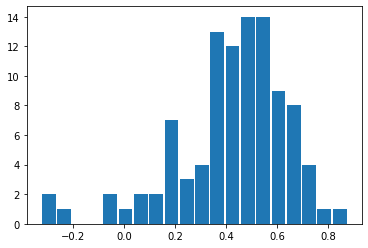

In [25]:
# ブートストラップ法

# ブートストラップ標本{x1*,..,xn*}は、標本{x1,..,xn}ｗｐ既知の母集団Fnとする独立同一サンプルによって得られる。
# xj(j=1,..,n)に確率1/nを与えて作る分布関数を「経験分布関数」といい、。ブートストラップ確率変数X*はP(X*=xi)=1/nをもつ。
# ブートストラップ法は何度でも抽出できるため、b回目のブートストラップ標本x*(b)=(x1*(b),..,xn*(b))に応じて、
# θ_hat*(b)=Tn(x*(b))を反復回数Bとしてb=1,..,Bで構成する。
# この一連の方法を「ブートストラップ法」あるいは、「ノンパラメトリックブートストラップ法」という。
# 他方、母集団に適当なパラメータを持つ確率分布が仮定され、そのパラメータに推定量を代入した確率分布からの
# リサンプリング法を「パラメトリックブートストラップ法」という。
# ブートストラップ法におけるθ_hatの標準誤差の推定は
# seB_hat = √1/(B-1)*Σ(θ_hat*(B)-θ_bar*)^2 で与えられる。
# 端的に言うと、ブートストラップ法は、標本集団から標本集団と同じ数だけランダムに値を再抽出し、
# 新しいデータセットを取得し統計値を計算することで母集団の性質を推定するための方法である。

#英語の点数
scoE = np.array([60, 89, 65, 60, 73, 52, 70, 65, 65, 70])
#数学の点数
scoM = np.array([88, 82, 60, 65, 85, 56, 57, 75, 42, 90])

scoTotal = np.array([scoE, scoM])
print(f"相関行列：\n{np.corrcoef(scoTotal)}")

# 相関係数リスト
r_list = []

# 点数リスト
scoE_data = []
scoM_data = []

for i in range(0,100):
    for j in range(0,10):
        #データから10個のデータをランダムに取り出し標本を作成
        var = np.random.randint(0,10)
        scoE_data.append(scoE[var])
        scoM_data.append(scoM[var])
        
    #作られた標本を元に相関係数を導出
    r = np.corrcoef(scoE_data, scoM_data)
        
    #相関係数を相関係数リストに代入
    r_list.append(r[0][1])

    #点数リストを初期化
    scoE_data.clear()
    scoM_data.clear()

plt.hist(r_list, bins=20, rwidth=0.9)
plt.show() # 導出した相関係数0.38(理論値)を中心とした正規分布に近似する